# Chapter 2

## 2.2   IPython Basics

### Running the IPython Shell

In [1]:
import numpy as np

In [2]:
np.random.seed(1234)
data = {i: np.random.randn() for i in range(7)}
data

{0: 0.47143516373249306,
 1: -1.1909756947064645,
 2: 1.4327069684260973,
 3: -0.3126518960917129,
 4: -0.7205887333650116,
 5: 0.8871629403077386,
 6: 0.8595884137174165}

### Tab Completion

Search variables

In [3]:
an_apple = 27
an_example = 42

In [4]:
# an<tab>
an_apple

27

Search methods and attributes

In [6]:
# b.<tab>
b.append(4)
b

[1, 2, 3, 4]

In [5]:
b = [1,2,3]

Search methods in a module

In [7]:
import datetime

In [10]:
# datetime.<tab>
datetime.date(year = 2022, month = 6, day = 23)

datetime.date(2022, 6, 23)

Note that IPython by default hides methods and attributes starting with underscores, such as magic methods and internal “private” methods and attributes, in order to avoid cluttering the display (and confusing novice users!). These, too, can be tab-completed, but you must first type an underscore to see them.

In [12]:
# np.random._<tab>
# np.random._generator()

Search files

In [13]:
# "/Users/duoduo/Desktop/<tab>"
path = "/Users/duoduo/Desktop/Madrid_metro.pdf"

Search function key-word arguments

In [14]:
def func_with_keywords(abra = 1, abbra = 2):
    return abra, abbra

In [15]:
# func_with_keywords(<tab>)
func_with_keywords(abbra = 3)

(1, 3)

### Introspection

In [16]:
b?

In [17]:
print?

This is referred to as *object introspection*. If the object is a function or instance method, the docstring, if defined, will also be shown.

In [18]:
def add_numbers(a, b):
    return a+b

Use `?` to show the docstring

In [19]:
add_numbers?

Use `??` to show function's source code

In [20]:
add_numbers??

`?` has a final usage, which is for searching the IPython namespace in a manner similar to the standard Unix or Windows command line.     
A number of characters combined with the wildcard (\*) will show all names matching the wildcard expression.

In [21]:
np.*load*?   # get a list of all functions in the top-level NumPy namespace containing "load"

### The %run Command

You can run any file as a Python program inside the environment of your IPython session using the `%run` command.

In [22]:
%run ipython_script_test.py

In [23]:
c

7.5

In [24]:
result

1.4666666666666666

In [ ]:
# %load ipython_script_test.py
def f(x, y, z):
    return (x+y) / z

a = 5
b = 6
c = 7.5

result = f(a, b, c)


### About Magic Commands

In [28]:
a = np.random.randn(100, 100)
%timeit np.dot(a, a)

33.7 µs ± 4.12 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [29]:
%debug?

Magic functions can be used by default without the percent sign, as long as no variable is defined with the same name as the magic function in question.

In [30]:
%pwd

'/Users/duoduo/Desktop/UM Online/Applied Data Science with Python/Python for Data Analysis'

In [31]:
foo = %pwd
foo

'/Users/duoduo/Desktop/UM Online/Applied Data Science with Python/Python for Data Analysis'

In [32]:
%quickref

In [33]:
%matplotlib

Using matplotlib backend: MacOSX


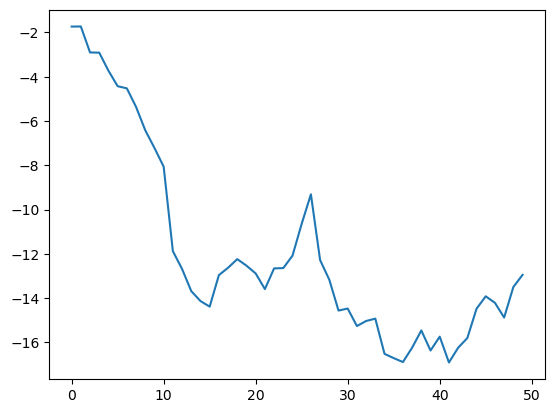

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("default")
plt.plot(np.random.randn(50).cumsum())

## 2.3   Python Language Basics

### Language Semantics

#### Variables and argument passing

In [38]:
a = [1, 2, 3]
b = a
print(a)
print(b)

[1, 2, 3]
[1, 2, 3]


In [39]:
a.append(4)
b

[1, 2, 3, 4]

#### Dynamic references, strong types

In [42]:
a = 5
isinstance(a, int)

True

In [43]:
b = 4.5
print(isinstance(a, (int, float)))
print(isinstance(b, (int, float)))

True
True


#### Attributes and methods

In [44]:
a = "foo"
getattr(a, "upper")

<function str.upper()>

While we will not extensively use the functions `getattr` and related functions `hasattr` and `setattr` in this book, they can be used very effectively to write generic, reusable code.

#### Duck typing

Often you may not care about the type of an object but rather only whether it has certain methods or behavior. This is sometimes called “duck typing,” after the saying “If it walks like a duck and quacks like a duck, then it’s a duck.” For example, you can verify that an object is iterable if it implemented the *iterator protocol*. For many objects, this means it has a `__iter__` “magic method,” though an alternative and better way to check is to try using the iter function:

In [45]:
def isiterable(obj):
    try:
        iter(obj)
        return True
    except TypeError:   # not iterale
        return False

In [46]:
isiterable('a string')

True

In [47]:
isiterable((3, 5))

True

In [48]:
isiterable(9)

False

A place where I use this functionality all the time is to write functions that can accept multiple kinds of input. A common case is writing a function that can accept any kind of sequence (list, tuple, ndarray) or even an iterator. You can first check if the object is a list (or a NumPy array) and, if it is not, convert it to be one:
```python
if not isinstance(x, list) and isiterable(x):
    x = list(x)
```

#### Binary operators and comparisons

To check if two references refer to the same object, use the `is` keyword. `is not` is also perfectly valid if you want to check that two objects are not the same:

In [49]:
a = [1, 2, 3]
b = a
c = list(a)

In [50]:
print(a is b)
print(a is not c)

True
True


In [51]:
print(a == b)
print(a == c)

True
True


Since `list` always creates a new Python list (i.e., a copy), we can be sure that `c` is distinct from `a`. Comparing with `is` is not the same as the `==` operator.

A very common use of `is` and `is not` is to check if a variable is `None`, since there is only one instance of `None`.

### Scalar Types

#### Strings

In [52]:
s = "12\\34"
ss = r"12\\34"
print(s)
print(ss)

12\34
12\\34


In [53]:
template = "{0:.2f} {1:s} are worth US${2:d}"
template.format(4.5560, "Argentine Pesos", 1)

'4.56 Argentine Pesos are worth US$1'